In [34]:
import pandas as pd
import numpy as np
import json

import random
random.seed(10)  # set the random seed to re-produce the deterministic result

from collections import Counter
import string
from matplotlib import pyplot as plt

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Selecting a random business b1

In [35]:
reviewList = []
print("Started Reading JSON file which contains multiple JSON objects")
with open('data/reviewSelected100.json', encoding = "ISO-8859-1") as datafile:
    for jsonObj in datafile:
        reviewDict = json.loads(jsonObj)
        reviewList.append(reviewDict)


print("Selecting a random business b1")
businessidList = []
for review in reviewList:
    businessidList.append(review["business_id"])


random_businessid = random.choice(businessidList)
print(type(random_businessid))
print("Random business b1 selected: "+random_businessid)  # AktuBx1W7c3ZdzwuaOp8xg

Started Reading JSON file which contains multiple JSON objects
Selecting a random business b1
<class 'str'>
Random business b1 selected: AktuBx1W7c3ZdzwuaOp8xg


## Extracting all reviews from b1 to form small dataset B1


In [36]:
B1_list = []
for review in reviewList:
    if review["business_id"] == random_businessid: # considering all reviews for same business b1
        B1_list.append(review["text"])

print(B1_list)  # list of strings with stop words and punctuations

['Gross!! I tried it cuz I woke across the street but OMG... dry ass food... I wanted to puke!!', 'fantastic, we tried 5 items and they were all excellent. our appetizer was the pot stickers, then we all shared the house special lo mein, the general xaos, the sesame beef, and the chicken wraps. all yummy, cant wait to go again. the woman behind the counter was polite, friendly, and very helpful.', "Not far from the house I really wanted to try LD after seeing a flier.  So I popped in with the GF after seeing a movie thinking we could eat and chat about it..\n\nWith a few missed turn offs we finally located the place as it truly is tucked away and off the beaten path.  After walking in we were greeted but not in a warm and welcoming sort of way but rather in a stoic way.\n\nI ordered up some Pad Thai and the GF ordered the Sesame Chicken.  The came out quickly and we began to eat.  The Pad Thai was fine but i did not really care for my GF's chicken.\n\nI really wanted to like this place

## Pre-processing of dataset B1
#### Tokenizing after removal of punctuations and stopwords 

In [37]:
# combine list of strings in B1_list to a single string and incaptitalized words
B1_string = ''.join(B1_list).lower()
#print(B1_string)

## remove all punctuation marks from string
B1_string_nopunc = B1_string.translate(str.maketrans('', '', string.punctuation))
#print(B1_string_nopunc)

## tokenize string B1_string_nopunc
word_tokens = word_tokenize(B1_string_nopunc)
# print(word_tokens)

## remove stop words from tokenized list of words without punctuation
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

# print(type(filtered_sentence))

## Show word frequency and top 10 words distribution before stemming

[('food', 116), ('chicken', 75), ('good', 68), ('place', 63), ('order', 62), ('chinese', 60), ('little', 49), ('shrimp', 41), ('like', 40), ('rice', 37)]
Counter({'food': 116, 'chicken': 75, 'good': 68, 'place': 63, 'order': 62, 'chinese': 60, 'little': 49, 'shrimp': 41, 'like': 40, 'rice': 37, 'fried': 34, 'beef': 33, 'go': 33, 'ordered': 33, 'soup': 33, 'thai': 32, 'lunch': 30, 'great': 28, 'would': 27, 'service': 26, 'restaurant': 26, 'dumpling': 25, 'back': 25, 'get': 25, 'also': 24, 'sour': 24, 'really': 23, 'time': 23, 'well': 23, 'see': 22, 'sauce': 22, 'try': 21, 'delivery': 21, 'pad': 20, 'one': 20, 'egg': 20, 'dont': 19, 'got': 19, 'even': 19, '2': 19, 'hot': 18, 'ive': 18, 'take': 18, 'better': 17, 'takeout': 17, 'spicy': 17, 'new': 17, 'always': 17, 'wait': 16, 'friendly': 16, 'crab': 16, 'years': 16, 'menu': 16, 'im': 16, 'took': 16, 'special': 15, 'eat': 15, 'family': 15, 'around': 15, '5': 14, 'came': 14, 'didnt': 14, 'pork': 14, 'sweet': 14, 'minutes': 14, 'first': 14, 

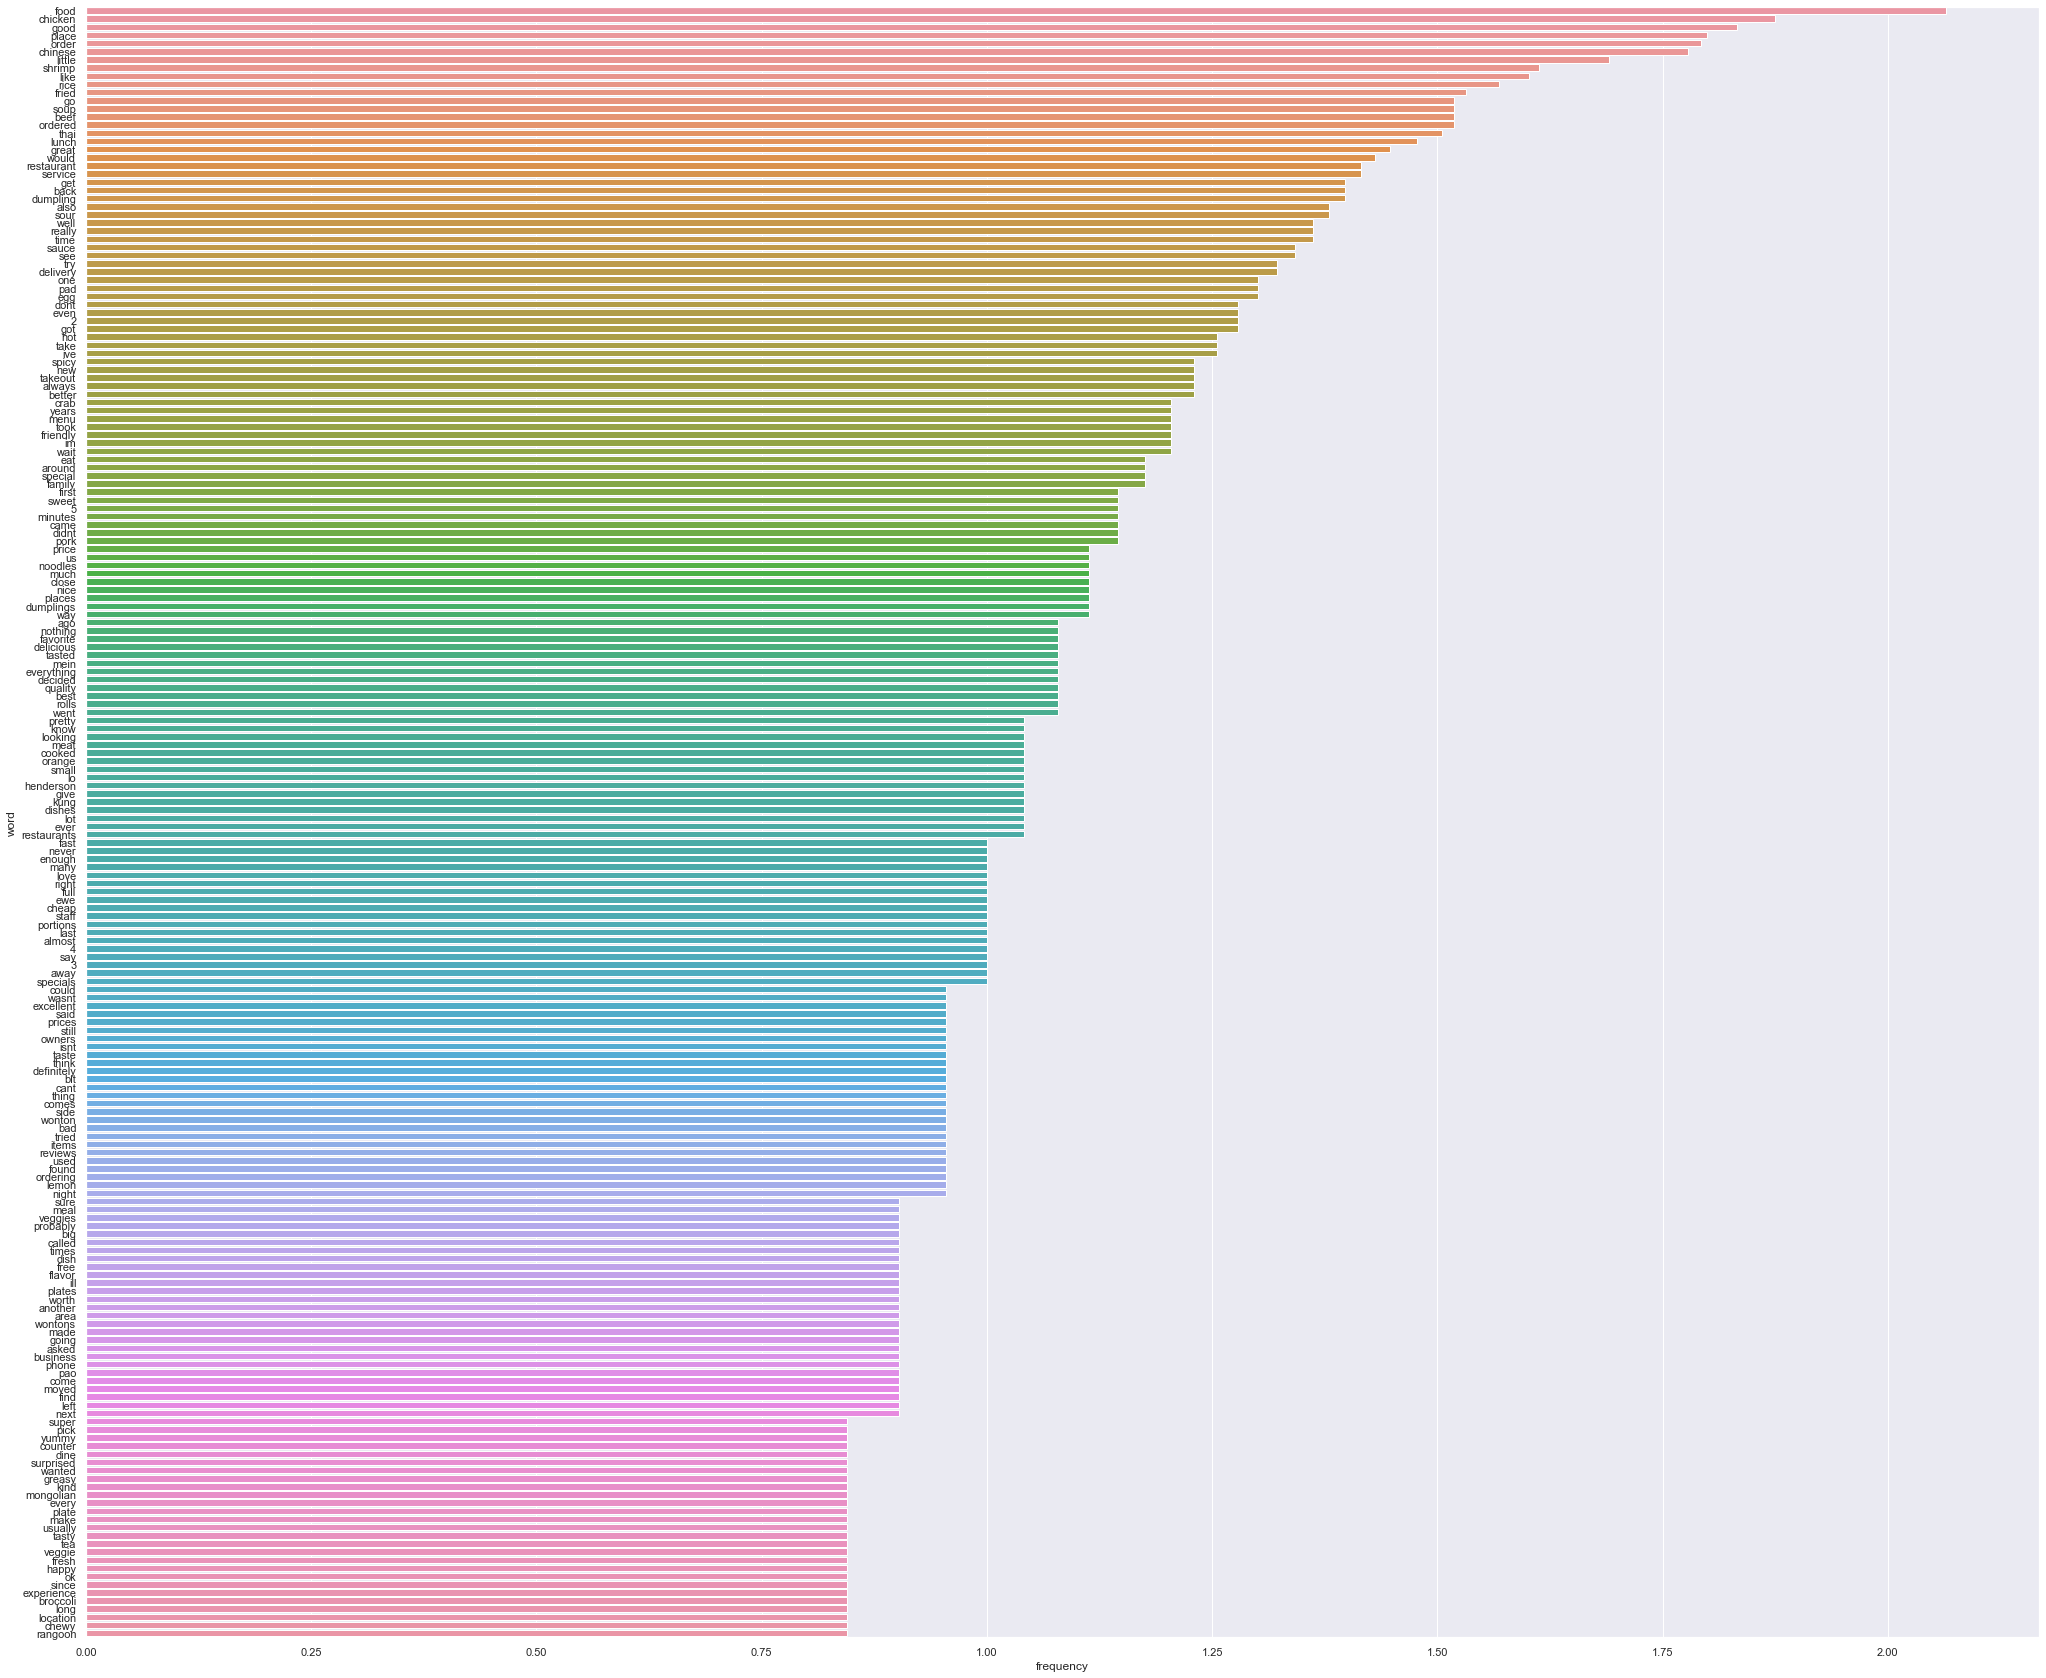

In [38]:
# count the frequency of each word and put in a dictionary with word (key), frequency (value)
count = Counter(filtered_sentence)

print(count.most_common(10)) # list word and frequency for top 10 words in a dictionary
print(count) # list word and frequency for all words in a dictionary

count = dict(count)
# Plot bar Graph
word_freq = pd.DataFrame(count.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
word_freq["frequency"] = np.log10(word_freq["frequency"])


# create plot of the different data frames
sns.set(rc={'figure.figsize':(35,30)})
b = sns.barplot(x='frequency',y='word',data=word_freq.head(200))
b.get_figure().savefig("images/b1_before_stem.png")

## Stemming algorithm

In [39]:
ps = PorterStemmer()

stemmed_list = []

for words_to_stem in filtered_sentence:
    stemmed_list.append(ps.stem(words_to_stem))

print(stemmed_list)

['gross', 'tri', 'cuz', 'woke', 'across', 'street', 'omg', 'dri', 'ass', 'food', 'want', 'pukefantast', 'tri', '5', 'item', 'excel', 'appet', 'pot', 'sticker', 'share', 'hous', 'special', 'lo', 'mein', 'gener', 'xao', 'sesam', 'beef', 'chicken', 'wrap', 'yummi', 'cant', 'wait', 'go', 'woman', 'behind', 'counter', 'polit', 'friendli', 'helpfulnot', 'far', 'hous', 'realli', 'want', 'tri', 'ld', 'see', 'flier', 'pop', 'gf', 'see', 'movi', 'think', 'could', 'eat', 'chat', 'miss', 'turn', 'off', 'final', 'locat', 'place', 'truli', 'tuck', 'away', 'beaten', 'path', 'walk', 'greet', 'warm', 'welcom', 'sort', 'way', 'rather', 'stoic', 'way', 'order', 'pad', 'thai', 'gf', 'order', 'sesam', 'chicken', 'came', 'quickli', 'began', 'eat', 'pad', 'thai', 'fine', 'realli', 'care', 'gf', 'chicken', 'realli', 'want', 'like', 'place', 'instead', 'realiz', 'mayb', 'dont', 'live', 'close', 'thoughtdumpl', 'name', 'didnt', 'tri', 'one', 'darn', 'next', 'time', 'tri', 'kung', 'pao', 'tripl', 'lunch', 'speci

## Show word frequency and top 10 words distribution after stemming

[('food', 119), ('order', 110), ('place', 78), ('chicken', 75), ('good', 68), ('chines', 60), ('littl', 49), ('like', 46), ('shrimp', 42), ('go', 41)]


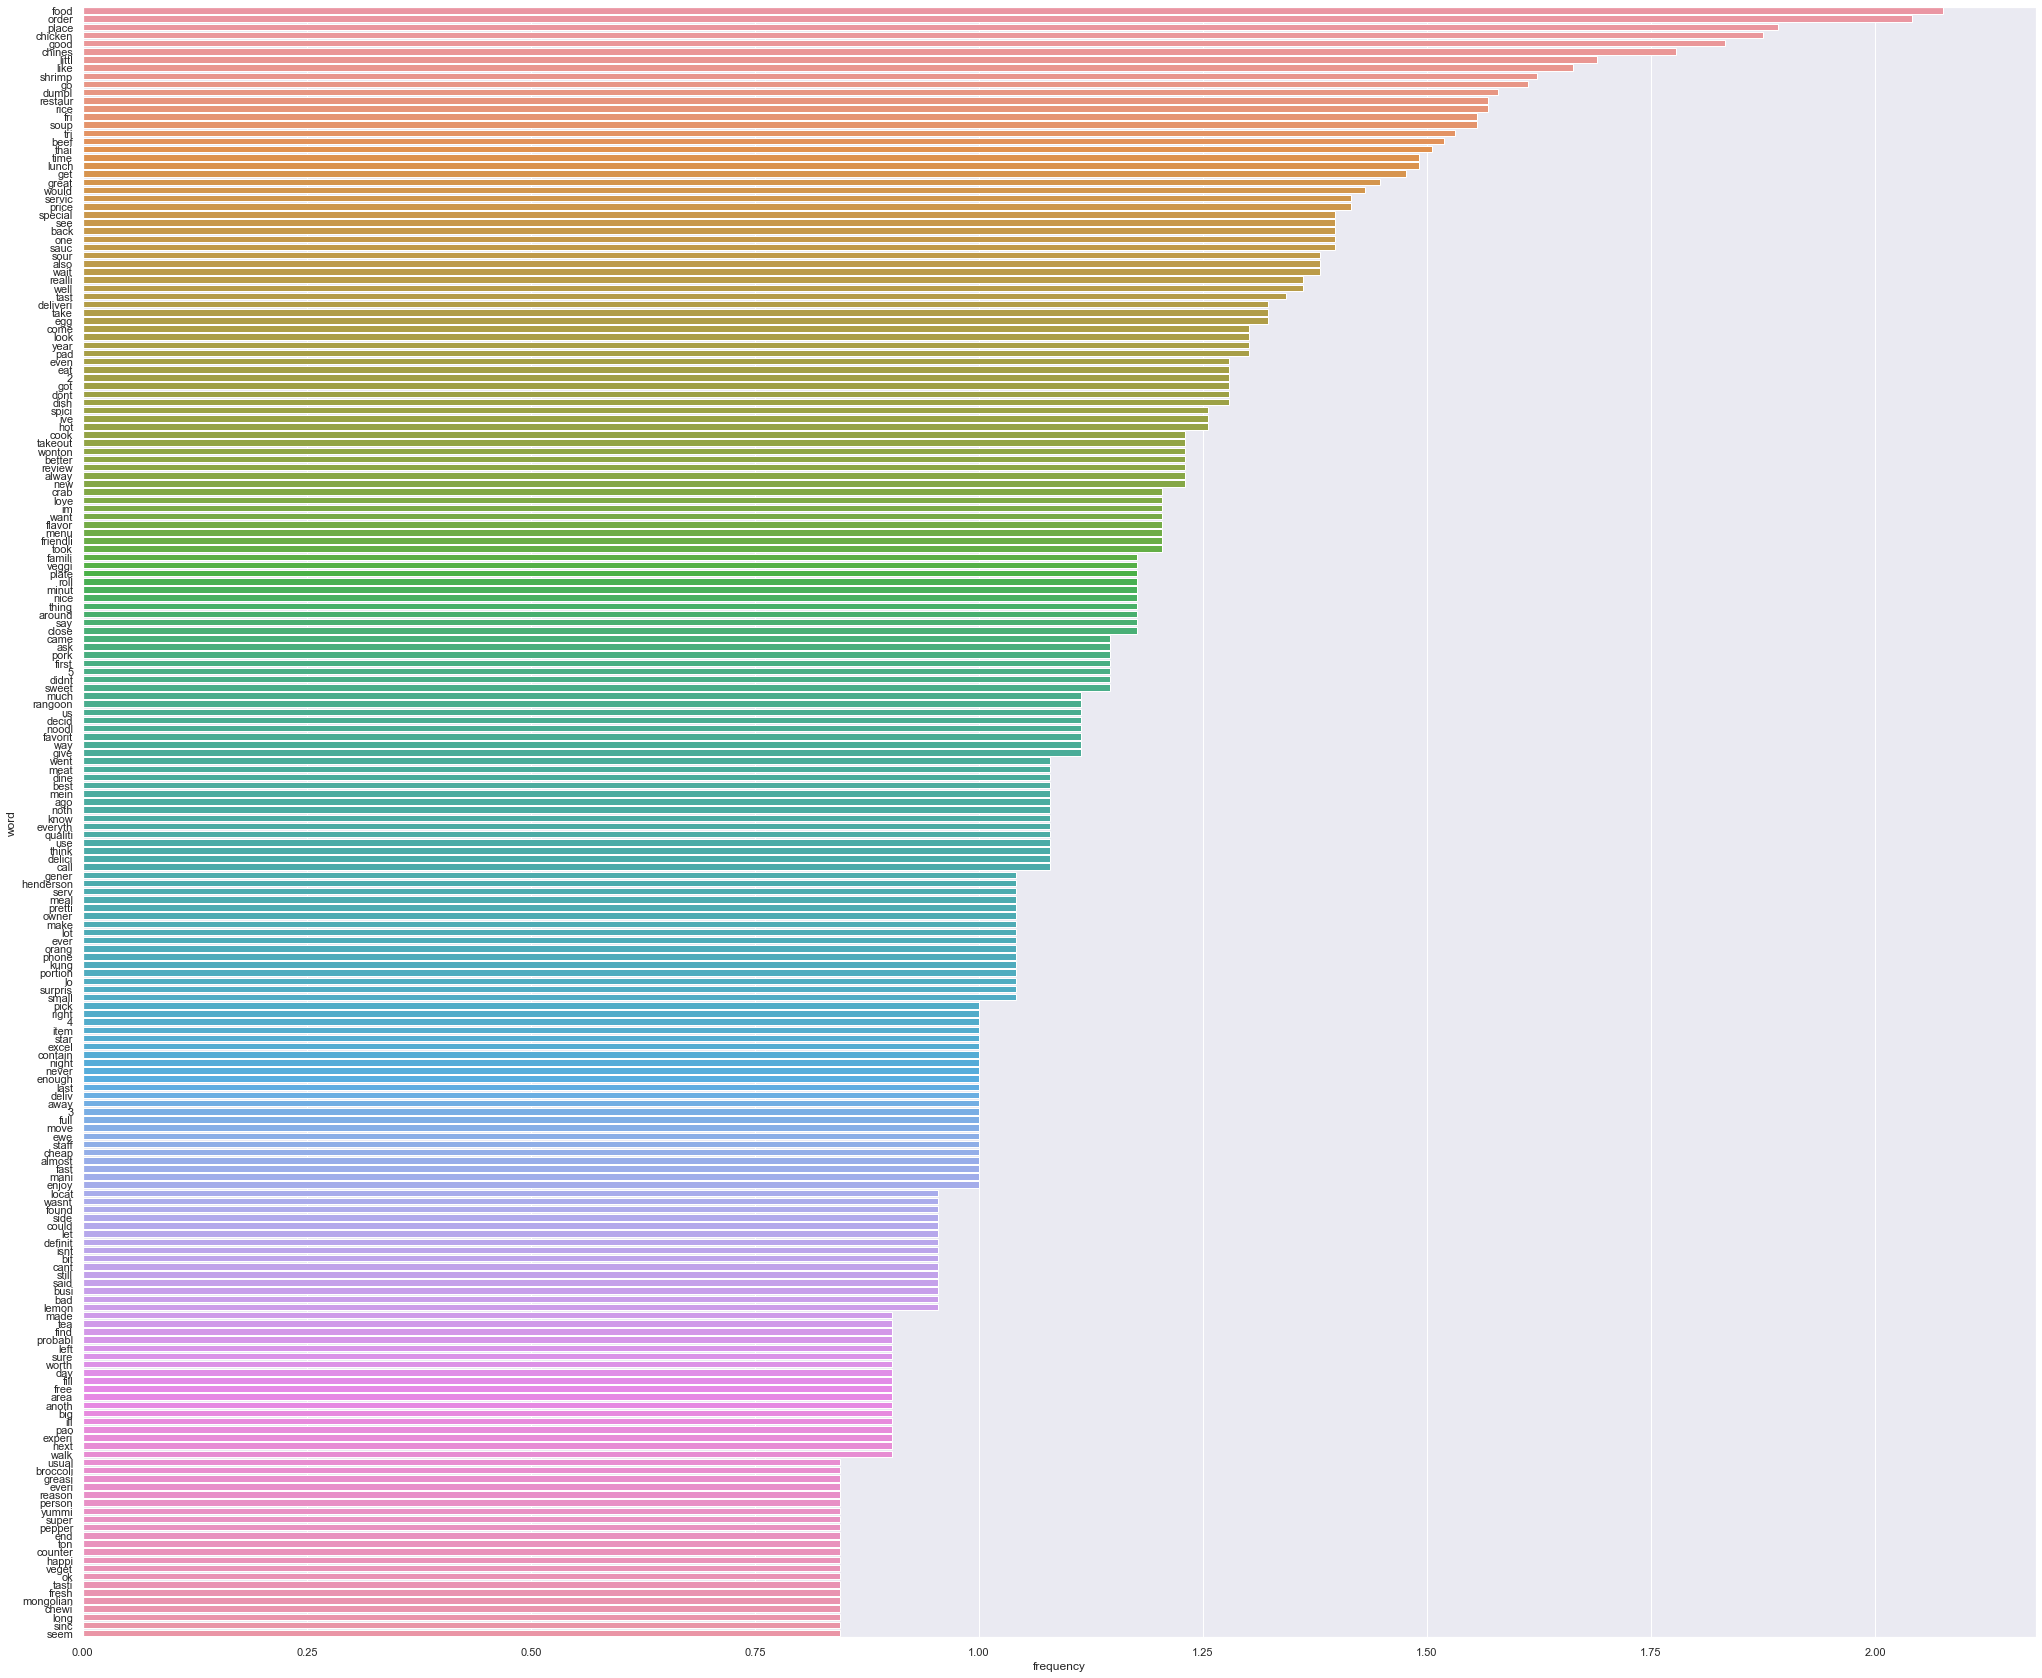

In [40]:
## count the frequeuncy of each word and put in a dictionary with word (key), frequency (value)
stemmed_count = Counter(stemmed_list)
print(stemmed_count.most_common(10)) # list word and frequency for top 10 words in a dictionary
#print(count) # list word and frequency for all words in a dictionary 

stemmed_count = dict(stemmed_count)
## Plot bar Graph


word_freq = pd.DataFrame(stemmed_count.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
word_freq["frequency"] = np.log10(word_freq["frequency"])

## create plot of the different data frames
sns.set(rc={'figure.figsize':(35,30)})
a = sns.barplot(x='frequency',y='word',data=word_freq.head(200))
a.get_figure().savefig("images/b1_after_stem.png")

# ---------------------------- end of business b1 ----------------------------

# Repeat process for another randomly selected business b2

## Selecting a random business b2


In [41]:
reviewList = []
print("Started Reading JSON file which contains multiple JSON objects")
with open('data/reviewSelected100.json', encoding = "ISO-8859-1") as datafile:
    for jsonObj in datafile:
        new_reviewDict = json.loads(jsonObj)
        reviewList.append(new_reviewDict)


print("Selecting a random business b2")
businessidList = []
for review in reviewList:
    businessidList.append(review["business_id"])


random_businessid = random.choice(businessidList)
print(type(random_businessid))
print("Random business b2 selected: "+random_businessid)

Started Reading JSON file which contains multiple JSON objects
Selecting a random business b2
<class 'str'>
Random business b2 selected: e-YnECeZNt8ngm0tu4X9mQ


## Extracting all reviews from b2 to form small dataset B2



In [42]:
B2_list = []
for review in reviewList:
    if review["business_id"] == random_businessid: # considering all reviews for same business b2
        B2_list.append(review["text"])

#print(B2_list)  # list of strings with stop words and punctuations

## Pre-processing of dataset B2
#### Tokenizing after removal of punctuations and stopwords 

In [43]:
# combine list of strings in B1_list to a single string
B2_string = ''.join(B2_list).lower()
#print(B1_string)

## remove all punctuation marks from string
B2_string_nopunc = B2_string.translate(str.maketrans('', '', string.punctuation))
#print(B1_string_nopunc)

## tokenize string B1_string_nopunc
word_tokens = word_tokenize(B2_string_nopunc)

## remove stop words from tokenized list of words without punctuation
stop_words = set(stopwords.words('english'))
filtered_sentence_B2 = [q for q in word_tokens if not q.lower() in stop_words]

print(filtered_sentence_B2)

['good', 'korean', 'grill', 'near', 'eaton', 'centre', 'marinate', 'good', 'got', 'beef', 'ox', 'liver', 'salmon', 'fish', 'fillet', 'chicken', 'pork', 'pork', 'belly', 'fish', 'fillet', 'bland', 'liver', 'meh', 'salmon', 'chicken', 'really', 'flavourable', 'fun', 'place', 'eat', 'date', 'group', 'friends', 'even', 'alone', 'judgments', 'staff', 'attentive', 'nice', 'considerate', 'bigger', 'groups', 'likely', 'seated', 'second', 'floor', 'way', 'bigger', 'caution', 'smell', 'like', 'bbq', 'grill', 'aftergood', 'foodwell', 'cook', 'great', 'place', 'good', 'location', 'decent', 'price', 'would', 'rated', 'higher', 'service', 'betterbeen', 'times', 'n', 'wait', 'n', 'call', 'get', 'food', 'drinks', 'servers', 'always', 'interested', 'look', 'gets', 'matter', 'polite', 'try', 'bei', 'dont', 'think', 'ive', 'ever', 'disappointed', 'korean', 'bbq', 'establishment', 'place', 'first', 'servers', 'took', 'forever', 'come', 'take', 'orders', 'thought', 'bit', 'ridiculous', 'one', 'us', 'wanted

## Show word frequency and top 10 words distribution before stemming

[('food', 99), ('korean', 93), ('meat', 84), ('grill', 76), ('place', 71), ('service', 67), ('good', 65), ('bbq', 64), ('eat', 52), ('get', 50)]


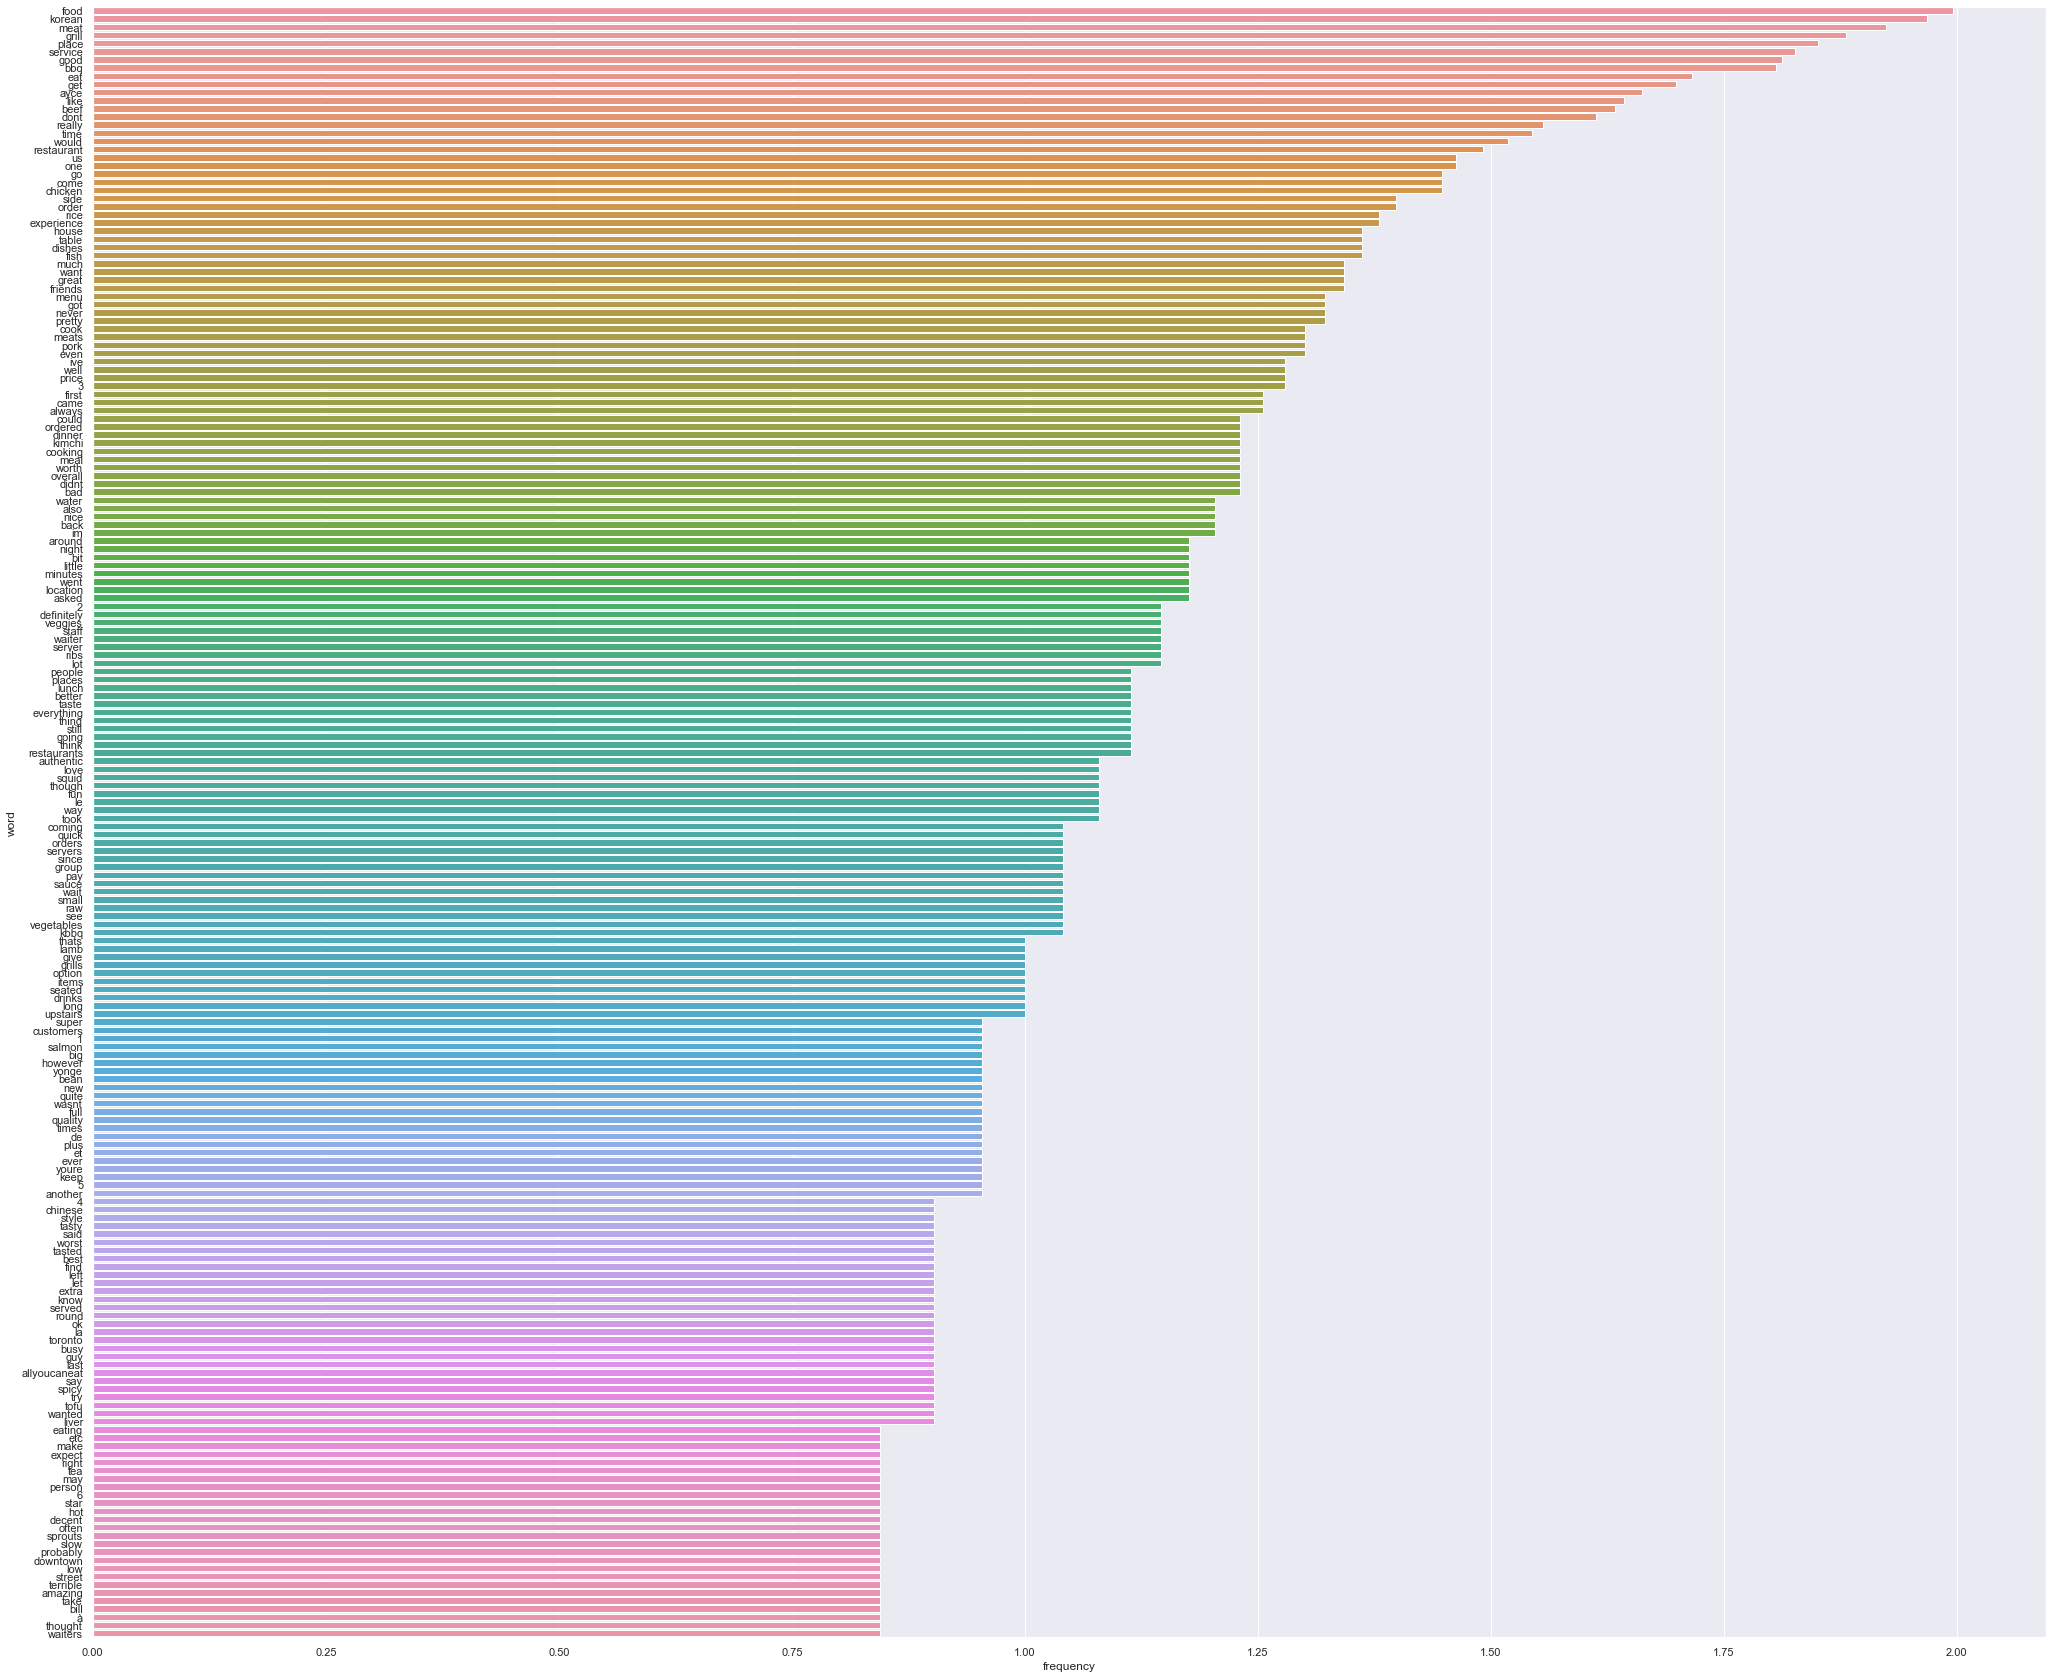

In [44]:
## count the frequeuncy of each word and put in a dictionary with word (key), frequency (value)
count = Counter(filtered_sentence_B2)
print(count.most_common(10)) # list word and frequency for top 10 words in a dictionary
#print(count) # list word and frequency for all words in a dictionary 

count = dict(count)

## Plot bar Graph


word_freq = pd.DataFrame(count.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
word_freq["frequency"] = np.log10(word_freq["frequency"])


## create plot of the different data frames
sns.set(rc={'figure.figsize':(35,30)})
c = sns.barplot(x='frequency',y='word',data=word_freq.head(200))
c.get_figure().savefig("images/b2_before_stem.png")

## Stemming algorithm

In [45]:
ps = PorterStemmer()

stemmed_list = []

for words_to_stem in filtered_sentence_B2:
    stemmed_list.append(ps.stem(words_to_stem))

print(stemmed_list)

['good', 'korean', 'grill', 'near', 'eaton', 'centr', 'marin', 'good', 'got', 'beef', 'ox', 'liver', 'salmon', 'fish', 'fillet', 'chicken', 'pork', 'pork', 'belli', 'fish', 'fillet', 'bland', 'liver', 'meh', 'salmon', 'chicken', 'realli', 'flavour', 'fun', 'place', 'eat', 'date', 'group', 'friend', 'even', 'alon', 'judgment', 'staff', 'attent', 'nice', 'consider', 'bigger', 'group', 'like', 'seat', 'second', 'floor', 'way', 'bigger', 'caution', 'smell', 'like', 'bbq', 'grill', 'aftergood', 'foodwel', 'cook', 'great', 'place', 'good', 'locat', 'decent', 'price', 'would', 'rate', 'higher', 'servic', 'betterbeen', 'time', 'n', 'wait', 'n', 'call', 'get', 'food', 'drink', 'server', 'alway', 'interest', 'look', 'get', 'matter', 'polit', 'tri', 'bei', 'dont', 'think', 'ive', 'ever', 'disappoint', 'korean', 'bbq', 'establish', 'place', 'first', 'server', 'took', 'forev', 'come', 'take', 'order', 'thought', 'bit', 'ridicul', 'one', 'us', 'want', 'order', 'veggi', 'order', 'well', 'secondli', '

## Show word frequency and top 10 words distribution after stemming

[('meat', 104), ('food', 99), ('grill', 96), ('korean', 94), ('place', 88), ('servic', 68), ('good', 66), ('bbq', 65), ('get', 61), ('eat', 59)]


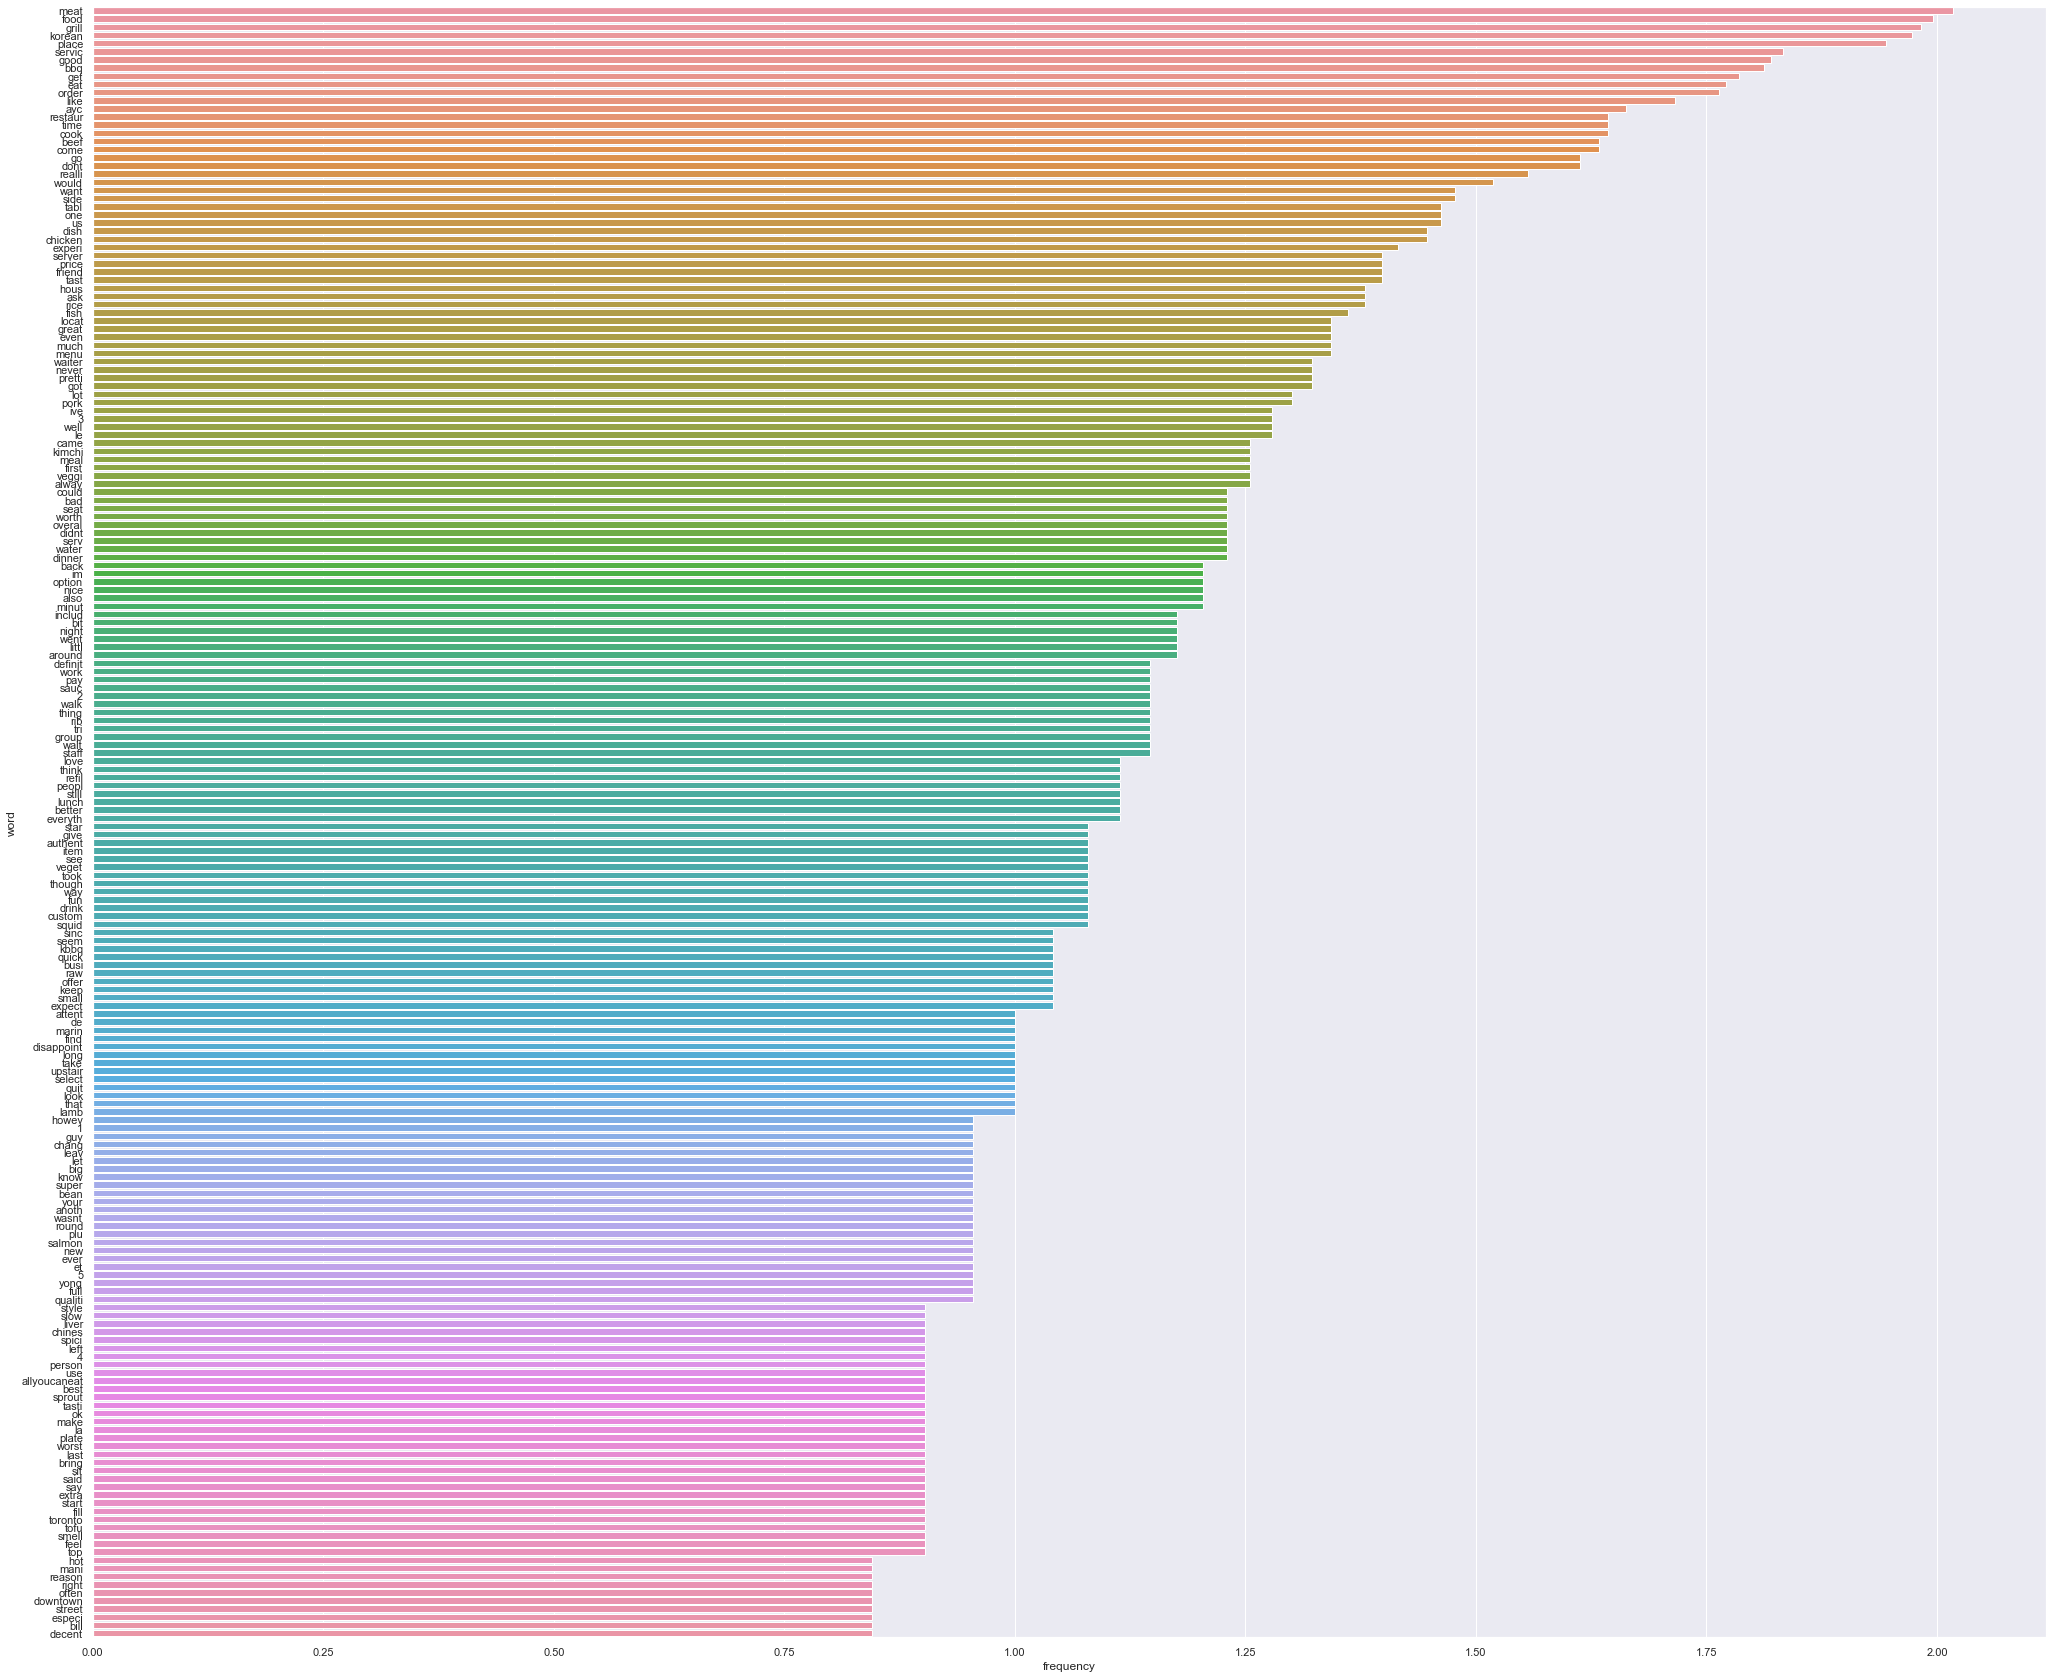

In [46]:
## count the frequeuncy of each word and put in a dictionary with word (key), frequency (value)
stemmed_count = Counter(stemmed_list)
print(stemmed_count.most_common(10)) # list word and frequency for top 10 words in a dictionary
#print(count) # list word and frequency for all words in a dictionary 

stemmed_count = dict(stemmed_count)

## Plot bar Graph


word_freq = pd.DataFrame(stemmed_count.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
word_freq["frequency"] = np.log10(word_freq["frequency"])


## create plot of the different data frames
sns.set(rc={'figure.figsize':(35,30)})
d = sns.barplot(x='frequency',y='word',data=word_freq.head(200))
d.get_figure().savefig("images/b2_after_stem.png")

# ---------------------------- end of business b2 ----------------------------